# Name: Gaurav Rajesh Makasare
# USCID: 7559721394
# email: makasare@usc.edu

In [1]:
# from google.colab import drive
# drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
import statistics
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import Dense
from keras.layers import Flatten, Conv1D
from keras.layers import Dropout

# 1. Text Classification

# It is highly recommended that you complete this project using Keras1 and Python.

# (a) In this problem, we are trying to build a classifier to analyze the sentiment of reviews. You are provided with text data in two folders: one folder involves positive reviews, and one folder involves negative reviews.


# (b) Data Exploration and Pre-processing

# i. You can use binary encoding for the sentiments , i.e y = 1 for positive senti-ments and y = −1 for negative sentiments.

# Ans: Done at a later stage in the project

# ii. The data are pretty clean. Remove the punctuation and numbers from the data.

In [3]:
def remove_punc(string):
    punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~0123456789'''
    for ele in string:  
        if ele in punc:  
            string = string.replace(ele, "") 
    return string
 


In [4]:
directory = ['../data/neg_copy/', '../data/neg_copy']
# 'content/drive/MyDrive/ML DS Final Project/data/neg_copy'
#created copies of pos and neg file and worked on it in order not to disturb the original data
for i in directory:
    for filename in os.listdir(i):
        f = os.path.join(i, filename)
        with open(f,'r',encoding="utf-8") as file:
            data = file.read()
        with open(f,"w+",encoding="utf-8") as file:
            file.write(remove_punc(data))
        






# iii. The name of each text file starts with cv number. Use text files 0-699 in each class for training and 700-999 for testing.

# Ans: Created the folders training_files and testing_files manually by selecting the files as the files are given in sorted order

# iv. Count the number of unique words in the whole dataset (train + test) and print it out.

In [5]:
#counting unique words in neg class
#referred https://stackoverflow.com/questions/11842548/how-do-i-count-unique-words-of-text-files-in-specific-directory-with-python
uniquewords = set([])
for root, dirs, files in os.walk("../data/neg_copy/"):
    for name in files:
        [uniquewords.add(x) for x in open(os.path.join(root,name)).read().split()]

# print(list(uniquewords))
print(len(uniquewords))

32379


In [6]:
uniquewords2 = set([])
for root, dirs, files in os.walk("../data/pos_copy/"):
    for name in files:
        [uniquewords2.add(x) for x in open(os.path.join(root,name)).read().split()]
        
print(len(uniquewords2))

34640


In [7]:
uw = set.union(uniquewords, uniquewords2)
print("Total number of unique words in the dataset are : ", len(uw))

Total number of unique words in the dataset are :  47156


In [8]:
# uw = set([])

# for root, dirs, files in os.walk("./data/neg_copy/"):
#     for name in files:
#         [uw.add(x) for x in open(os.path.join(root,name)).read().split()]
# for root, dirs, files in os.walk("./data/pos_copy/"):
#     for name in files:
#         [uw.add(x) for x in open(os.path.join(root,name)).read().split()]
        
# print(len(uw))

# v. Calculate the average review length and the standard deviation of review lengths. Report the results.

In [9]:
negreviewlength = []
for root, dirs, files in os.walk("../data/neg_copy/"):
    for name in files:
        totalwords = []
        [totalwords.append(x) for x in open(os.path.join(root,name)).read().split()]
        negreviewlength.append(len(totalwords))
        
print(len(negreviewlength))

1000


In [10]:
posreviewlength = []
for root, dirs, files in os.walk("../data/pos_copy/"):
    for name in files:
        totalwords = []
        [totalwords.append(x) for x in open(os.path.join(root,name)).read().split()]
        posreviewlength.append(len(totalwords))
        
print(len(posreviewlength))

1000


In [11]:
posreviewlength

[727,
 313,
 669,
 458,
 528,
 766,
 781,
 263,
 569,
 409,
 493,
 594,
 1052,
 373,
 511,
 468,
 655,
 333,
 677,
 909,
 953,
 429,
 1031,
 620,
 522,
 867,
 403,
 610,
 1066,
 543,
 620,
 677,
 214,
 1143,
 605,
 1058,
 696,
 497,
 449,
 736,
 762,
 470,
 643,
 1030,
 474,
 747,
 589,
 577,
 163,
 609,
 593,
 516,
 778,
 816,
 787,
 654,
 1591,
 722,
 542,
 254,
 252,
 764,
 661,
 213,
 803,
 1348,
 899,
 649,
 375,
 433,
 438,
 443,
 784,
 559,
 788,
 1115,
 744,
 308,
 688,
 525,
 792,
 164,
 922,
 873,
 1230,
 745,
 685,
 546,
 376,
 657,
 847,
 753,
 1149,
 579,
 1176,
 272,
 427,
 566,
 516,
 230,
 1238,
 840,
 640,
 776,
 541,
 2264,
 543,
 744,
 1844,
 847,
 1224,
 952,
 740,
 639,
 506,
 418,
 906,
 295,
 832,
 570,
 416,
 906,
 283,
 789,
 604,
 987,
 601,
 702,
 804,
 2190,
 690,
 941,
 516,
 419,
 722,
 611,
 718,
 821,
 828,
 588,
 777,
 358,
 631,
 425,
 840,
 755,
 207,
 285,
 278,
 593,
 382,
 526,
 274,
 742,
 539,
 726,
 486,
 574,
 324,
 747,
 1171,
 993,
 531,
 357

In [12]:
negreviewlength

[743,
 560,
 195,
 259,
 398,
 449,
 265,
 453,
 1121,
 739,
 199,
 542,
 732,
 775,
 1104,
 657,
 510,
 420,
 1113,
 387,
 214,
 863,
 508,
 481,
 810,
 660,
 771,
 350,
 860,
 419,
 878,
 382,
 296,
 602,
 770,
 479,
 620,
 420,
 564,
 860,
 743,
 466,
 388,
 630,
 681,
 729,
 711,
 324,
 697,
 236,
 680,
 921,
 357,
 1018,
 722,
 588,
 232,
 897,
 610,
 422,
 390,
 737,
 403,
 877,
 1197,
 613,
 623,
 240,
 560,
 513,
 1009,
 795,
 448,
 708,
 676,
 291,
 260,
 770,
 526,
 952,
 503,
 568,
 969,
 336,
 560,
 1041,
 949,
 271,
 596,
 396,
 1011,
 434,
 428,
 832,
 430,
 442,
 403,
 447,
 681,
 500,
 388,
 410,
 620,
 424,
 330,
 558,
 575,
 755,
 422,
 861,
 320,
 865,
 467,
 395,
 701,
 613,
 664,
 883,
 613,
 744,
 412,
 202,
 1088,
 699,
 888,
 1152,
 492,
 446,
 648,
 649,
 831,
 592,
 804,
 1004,
 282,
 210,
 352,
 603,
 477,
 423,
 463,
 477,
 602,
 703,
 620,
 722,
 606,
 953,
 257,
 488,
 812,
 593,
 478,
 920,
 1057,
 304,
 628,
 956,
 535,
 475,
 837,
 401,
 426,
 601,
 502

In [13]:
allreviewlength = posreviewlength + negreviewlength

In [14]:
print(len(allreviewlength))

2000


In [15]:
print("Average review length is :", sum(allreviewlength)/len(allreviewlength))

Average review length is : 644.5415


In [16]:
print("The standard deviation of the reviews is: ", statistics.pstdev(allreviewlength))

The standard deviation of the reviews is:  285.01493518366715


# vi. Plot the histogram of review lengths.

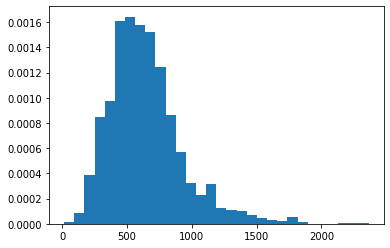

In [17]:
# plt.style.use('ggplot')
plt.hist(allreviewlength,density = True, bins=30)
plt.show()

In [18]:
print(max(allreviewlength))

2363


# vii. To represent each text (= data point), there are many ways. In NLP/Deep Learning terminology, this task is called tokenization. It is common to rep- resent text using popularity/ rank of words in text. The most common word in the text will be represented as 1, the second most common word will be represented as 2, etc. Tokenize each text document using this method.2

In [19]:
#creating a list of strings of each document
#referred https://www.kdnuggets.com/2020/03/tensorflow-keras-tokenization-text-data-prep.html
directory = '../data/training_files/'
maintraindata = []
filenames = []
for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        filenames.append(f)
        with open(f,'r',encoding="utf-8") as file:
            data = file.read().replace('\n', ' ')
            maintraindata.append(data)

In [20]:
directory = '../data/testing_files/'
maintestdata = []
filenames = []
for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        filenames.append(f)
        with open(f,'r',encoding="utf-8") as file:
            data = file.read().replace('\n', ' ')
            maintestdata.append(data)

In [21]:
print(maintraindata)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [22]:
maintraindata[1]

'well  heres a distasteful  thoroughly amateurish item that  surprisingly  was actually a boxoffice hit at the time of its release   after just viewing the film for the first time  my primary question is how did anyone with an iq north of  enjoy this movie   it is cheap  idiotic  unfunny  and not nearly as raunchy as i had heard it was   at least some smut would have livened things up a bit     porkys   tells the story  if you can call it that  of four clueless high school buddies  pee wee  dan monahan   billy  mark herrier   tommy  wyatt knight   and mickey  roger wilson   whom desperately want to get laid   women  for the most part  are a mystery to them  and in this movie  they are to the audience  as well  since all of them are written and acted as if they are aliens from a different planet    their plan is sidetracked  however  when they venture out to a smarmy strip bar named porkys  which they are able to get into using fake ids   after they pay the manager onehundred bucks for 

In [23]:
len(maintraindata)

1400

In [24]:
# print(filenames[1])

In [25]:
num_words = 1000
oov_token = '<UNK>'
pad_type = 'post'
trunc_type = 'post'

In [26]:
#applying tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(maintraindata)

In [27]:
# print(len(maintestdata))

In [28]:
train_sequences = tokenizer.texts_to_sequences(maintraindata)

In [29]:
test_sequences = tokenizer.texts_to_sequences(maintestdata)

In [30]:
train_sequences[0]

[2315,
 5031,
 440,
 4,
 80,
 64,
 300,
 8,
 401,
 228,
 7297,
 194,
 1,
 615,
 4,
 1270,
 5,
 17234,
 52,
 32,
 68,
 325,
 555,
 1461,
 41,
 4559,
 12065,
 14,
 965,
 1373,
 1214,
 10574,
 2,
 1374,
 190,
 17235,
 706,
 2,
 1432,
 2756,
 6787,
 27,
 132,
 5,
 32,
 3841,
 1,
 7857,
 4,
 615,
 2,
 3435,
 2,
 14089,
 397,
 3,
 24,
 7858,
 377,
 11,
 2,
 7298,
 4560,
 1154,
 5335,
 14090,
 326,
 29,
 2,
 215,
 7,
 35,
 94,
 43,
 55,
 12066,
 2211,
 5,
 35,
 12067,
 3998,
 22939,
 10575,
 22940,
 3697,
 17236,
 789,
 43,
 164,
 113,
 14091,
 45,
 58,
 464,
 95,
 335,
 9,
 6,
 55,
 17237,
 14092,
 22941,
 22942,
 5,
 14093,
 54,
 39,
 43,
 55,
 3101,
 35,
 1241,
 113,
 2422,
 29,
 2,
 1916,
 11,
 2,
 834,
 3,
 1716,
 2026,
 10576,
 5598,
 55,
 12068,
 35,
 182,
 461,
 4,
 1,
 1375,
 2,
 234,
 1293,
 130,
 1717,
 14094,
 806,
 5,
 72,
 54,
 136,
 360,
 1603,
 807,
 1155,
 95,
 5,
 23,
 2,
 1841,
 2027,
 1,
 7859,
 2316,
 4,
 555,
 180,
 34,
 32,
 5,
 38,
 1,
 1658,
 3,
 17238,
 10577,
 17235

In [31]:
test_sequences

[[7,
  122,
  116,
  4937,
  18400,
  296,
  142,
  19,
  1,
  317,
  885,
  22380,
  1336,
  2013,
  11,
  1,
  2074,
  4,
  12710,
  44,
  470,
  39,
  285,
  5,
  620,
  85,
  1,
  1359,
  3878,
  4,
  122,
  3,
  8301,
  10325,
  4,
  122,
  676,
  5,
  23,
  1,
  12168,
  1190,
  12,
  116,
  1656,
  19851,
  7,
  119,
  248,
  43,
  885,
  4004,
  105,
  23,
  4820,
  11,
  4975,
  2484,
  116,
  697,
  1396,
  5,
  8240,
  1,
  864,
  4106,
  4,
  9184,
  8,
  28937,
  1963,
  21,
  677,
  1,
  177,
  4,
  23236,
  5097,
  3,
  2475,
  8,
  1219,
  5,
  7594,
  38,
  7100,
  7702,
  3,
  4829,
  4816,
  4,
  216,
  52,
  101,
  7078,
  27,
  11331,
  19,
  1,
  13405,
  12,
  74,
  288,
  4975,
  1097,
  12,
  79,
  1851,
  10731,
  4,
  12710,
  105,
  23,
  2171,
  5,
  1,
  159,
  21,
  7397,
  914,
  782,
  10731,
  4,
  142,
  1744,
  44,
  2255,
  139,
  49,
  4,
  142,
  66,
  77,
  739,
  552,
  945,
  159,
  25,
  4,
  119,
  697,
  30,
  2288,
  133,
  13181,
  27,
  3

In [32]:
allreviewlength.sort()
print(allreviewlength)

[16, 65, 103, 112, 119, 120, 141, 143, 149, 157, 159, 163, 164, 170, 171, 174, 182, 184, 188, 190, 193, 194, 195, 195, 197, 197, 199, 201, 202, 202, 202, 203, 207, 207, 207, 208, 210, 213, 214, 214, 216, 218, 219, 221, 223, 223, 224, 225, 226, 226, 230, 231, 232, 232, 234, 236, 236, 236, 237, 237, 240, 240, 240, 241, 241, 241, 242, 243, 244, 246, 247, 249, 250, 250, 250, 251, 251, 252, 252, 252, 254, 255, 255, 255, 256, 256, 256, 257, 259, 260, 260, 262, 262, 263, 264, 264, 265, 266, 269, 269, 269, 270, 270, 270, 270, 271, 271, 271, 271, 272, 273, 273, 273, 274, 274, 275, 276, 277, 278, 280, 280, 281, 282, 282, 282, 283, 283, 283, 284, 285, 285, 286, 286, 286, 286, 287, 287, 287, 287, 289, 289, 290, 291, 292, 292, 292, 293, 294, 295, 295, 295, 296, 296, 297, 297, 297, 298, 298, 298, 298, 298, 298, 298, 300, 301, 301, 301, 301, 301, 301, 302, 302, 302, 304, 304, 304, 304, 305, 307, 307, 308, 309, 312, 312, 313, 313, 315, 316, 317, 317, 317, 320, 320, 320, 320, 320, 322, 323, 323, 323, 3

# viii. Select a review length L that 70% of the reviews have a length below it. If you feel more adventurous, set the threshold to 90%.

In [33]:
k = int(0.7*(len(allreviewlength)))


In [34]:
print("The reviewlength that has 70% reviews with length below it are : ",allreviewlength[k+1])

The reviewlength that has 70% reviews with length below it are :  737


In [35]:
maxlen = allreviewlength[k+1]
maxlen

737

In [36]:
len(train_sequences)

1400

In [37]:
len(test_sequences)

600

In [38]:
print(type(test_sequences))

<class 'list'>


# ix. Truncate reviews longer than L words and zero-pad reviews shorter than L so that all texts (= data points) are of length L.3

In [39]:
train_padded = pad_sequences(train_sequences, padding=pad_type, maxlen=maxlen)

In [40]:
test_padded = pad_sequences(test_sequences, padding=pad_type, maxlen=maxlen)

In [41]:
print("Padded train sequesnces are: ")
print(train_padded)

Padded train sequesnces are: 
[[ 2315  5031   440 ...     0     0     0]
 [   83  1689     2 ...     0     0     0]
 [   49   262   851 ...   155 22968    75]
 ...
 [ 5017   317    98 ...     0     0     0]
 [13657     6     1 ...     3  1816  1636]
 [   26   194   122 ...     0     0     0]]


In [42]:
print("Padded test sequences are: ")
print(test_padded)

Padded test sequences are: 
[[    7   122   116 ...     0     0     0]
 [ 1369   120   331 ...     0     0     0]
 [   83    51    34 ...     0     0     0]
 ...
 [   39   277    79 ...     4 12627  4337]
 [   14   862  2464 ...     0     0     0]
 [ 3553    12     1 ...     0     0     0]]


# (c) Word Embeddings

# i. One can use tokenized text as inputs to a deep neural network. However, a re- cent breakthrough in NLP suggests that more sophisticated representations of text yield better results. These sophisticated representations are called word embeddings. “Word embedding is a term used for representation of words for text analysis, typically in the form of a real-valued vector that encodes the meaning of the word such that the words that are closer in the vector space are expected to be similar in meaning.”4. Most deep learning modules (including Keras) provide a convenient way to convert positive integer rep- resentations of words into a word embedding by an “Embedding layer.” The layer accepts arguments that define the mapping of words into embeddings including the maximum number of expected words also called the vocabulary size (e.g. the largest integer value). The layer also allows you to specify the dimension for each word vector, called the “output dimension.” We would like to use a word embedding layer for this project. Assume that we are inter- ested in the top 5,000 words. This means that in each integer sequence that represents each document, we set to zero those integers that represent words that are not among the top 5,000 words in the document.5 If you feel more adventurous, use all the words that appear in this corpus. Choose the length of the embedding vector for each word to be 32. Hence, each document is represented as a 32 × L matrix

In [43]:
modified_train_padded = train_padded

In [44]:
modified_test_padded = test_padded

In [45]:
for i in range(len(modified_train_padded)):
    for j in range(len(modified_train_padded[i])):
        if modified_train_padded[i][j]>5000:
              modified_train_padded[i][j] = 0

In [46]:
for i in range(len(modified_test_padded)):
    for j in range(len(modified_test_padded[i])):
        if modified_test_padded[i][j]>5000:
            modified_test_padded[i][j] = 0

### Making changes for the embeded layer

In [47]:
modified_train_padded

array([[2315,    0,  440, ...,    0,    0,    0],
       [  83, 1689,    2, ...,    0,    0,    0],
       [  49,  262,  851, ...,  155,    0,   75],
       ...,
       [   0,  317,   98, ...,    0,    0,    0],
       [   0,    6,    1, ...,    3, 1816, 1636],
       [  26,  194,  122, ...,    0,    0,    0]], dtype=int32)

In [48]:
modified_test_padded

array([[   7,  122,  116, ...,    0,    0,    0],
       [1369,  120,  331, ...,    0,    0,    0],
       [  83,   51,   34, ...,    0,    0,    0],
       ...,
       [  39,  277,   79, ...,    4,    0, 4337],
       [  14,  862, 2464, ...,    0,    0,    0],
       [3553,   12,    1, ...,    0,    0,    0]], dtype=int32)

# ii. Flatten the matrix of each document to a vector

# Ans: Flattening is done during the model definition in the below models

# d) Multi-Layer Perceptron

# i. Train a MLP with three (dense) hidden layers each of which has 50 ReLUs and one output layer with a single sigmoid neuron. Use a dropout rate of 20% for the first layer and 50% for the other layers. Use ADAM optimizer and binary cross entropy loss (which is equivalent to having a softmax in the output). To avoid overfitting, just set the number of epochs as 2. Use a batch size of 10.

# ii. Report the train and test accuracies of this model.

### Creating labels for training_files and testing_files

In [49]:
directory = '../data/pos_copy/'
posfiles = []
for file in os.listdir(directory):
    posfiles.append(file)

directory = '../data/training_files/'
temp = []
for file in os.listdir(directory):
    temp.append(file)

train_sentiment = []
for i in temp:
    if i in posfiles:
        train_sentiment.append(1)
    else:
        train_sentiment.append(0)
  

In [50]:
print(len(train_sentiment))

1400


In [51]:
directory = '../data/pos_copy/'
posfiles = []
for file in os.listdir(directory):
    posfiles.append(file)

directory = '../data/testing_files/'
temp = []
for file in os.listdir(directory):
    temp.append(file)

test_sentiment = []
for i in temp:
    if i in posfiles:
        test_sentiment.append(1)
    else:
        test_sentiment.append(0)

In [52]:
print(len(test_sentiment))

600


In [53]:
model = Sequential()
model.add(Embedding(5001, 32, input_length = maxlen))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 737, 32)           160032    
                                                                 
 flatten (Flatten)           (None, 23584)             0         
                                                                 
 dense (Dense)               (None, 50)                1179250   
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 50)                2

In [54]:
import numpy as np
model.fit(modified_train_padded, np.array(train_sentiment), epochs=8, verbose=1)


Epoch 1/8
44/44 [==============================] - 2s 21ms/step - loss: 0.6946 - accuracy: 0.5064
Epoch 2/8
44/44 [==============================] - 1s 20ms/step - loss: 0.6778 - accuracy: 0.5893
Epoch 3/8
44/44 [==============================] - 1s 20ms/step - loss: 0.5770 - accuracy: 0.7243
Epoch 4/8
44/44 [==============================] - 1s 20ms/step - loss: 0.2169 - accuracy: 0.9407
Epoch 5/8
44/44 [==============================] - 1s 20ms/step - loss: 0.0488 - accuracy: 0.9893
Epoch 6/8
44/44 [==============================] - 1s 20ms/step - loss: 0.0182 - accuracy: 0.9957
Epoch 7/8
44/44 [==============================] - 1s 20ms/step - loss: 0.0113 - accuracy: 0.9971
Epoch 8/8
44/44 [==============================] - 1s 20ms/step - loss: 0.0070 - accuracy: 0.9993


In [55]:
loss, accuracy = model.evaluate(modified_test_padded, np.array(test_sentiment), verbose=1)
print('Accuracy: %f' % (accuracy*100))


19/19 [==============================] - 0s 6ms/step - loss: 1.7363 - accuracy: 0.6217
Accuracy: 62.166667


# e) One-Dimensional Convolutional Neural Network:

# Although CNNs are mainly used for image data, they can also be applied to text data, as text also has adjacency information. Keras supports one-dimensional convolutions and pooling by the Conv1D and MaxPooling1D classes respectively

# i. After the embedding layer, insert a Conv1D layer. This convolutional layer has 32 feature maps , and each of the 32 kernels has size 3, i.e. reads embedded word representations 3 vector elements of the word embedding at a time. The convolutional layer is followed by a 1D max pooling layer with a length and stride of 2 that halves the size of the feature maps from the convolutional layer. The rest of the network is the same as the neural network above.

# ii. Report the train and test accuracies of this model.

In [56]:
#referred https://www.datatechnotes.com/2020/02/classification-example-with-keras-cnn.html
from tensorflow.keras.layers import MaxPooling1D
modelcnn = Sequential()
modelcnn.add(Embedding(5001, 32, input_length = maxlen))
modelcnn.add(Conv1D(filters=32,kernel_size=3,activation="relu"))
modelcnn.add(MaxPooling1D(pool_size=2))
modelcnn.add(Flatten())

In [57]:
modelcnn.add(Dense(50, activation='relu'))
modelcnn.add(Dropout(0.2))
modelcnn.add(Dense(50, activation='relu'))
modelcnn.add(Dropout(0.5))
modelcnn.add(Dense(50, activation='relu'))
modelcnn.add(Dropout(0.5))
modelcnn.add(Dense(1, activation='sigmoid'))
modelcnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(modelcnn.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 737, 32)           160032    
                                                                 
 conv1d (Conv1D)             (None, 735, 32)           3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 367, 32)          0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 11744)             0         
                                                                 
 dense_4 (Dense)             (None, 50)                587250    
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                      

In [58]:
modelcnn.fit(modified_train_padded, np.array(train_sentiment), epochs=8, verbose=1)

Epoch 1/8
44/44 [==============================] - 3s 42ms/step - loss: 0.6985 - accuracy: 0.4900
Epoch 2/8
44/44 [==============================] - 2s 39ms/step - loss: 0.6914 - accuracy: 0.5264
Epoch 3/8
44/44 [==============================] - 2s 39ms/step - loss: 0.6873 - accuracy: 0.5214
Epoch 4/8
44/44 [==============================] - 2s 38ms/step - loss: 0.6601 - accuracy: 0.5914
Epoch 5/8
44/44 [==============================] - 2s 39ms/step - loss: 0.5181 - accuracy: 0.8121
Epoch 6/8
44/44 [==============================] - 2s 38ms/step - loss: 0.2740 - accuracy: 0.9643
Epoch 7/8
44/44 [==============================] - 2s 39ms/step - loss: 0.1324 - accuracy: 0.9743
Epoch 8/8
44/44 [==============================] - 2s 39ms/step - loss: 0.0492 - accuracy: 0.9964


In [59]:
loss, accuracy = modelcnn.evaluate(modified_test_padded, np.array(test_sentiment), verbose=1)
print('Accuracy: %f' % (accuracy*100))

19/19 [==============================] - 0s 11ms/step - loss: 1.2605 - accuracy: 0.7033
Accuracy: 70.333332


# (f) Long Short-Term Memory Recurrent Neural Network:

# The structure of the LSTM we are going to use is shown in the following figure.

# i. Each word is represented to LSTM as a vector of 32 elements and the LSTM is followed by a dense layer of 256 ReLUs. Use a dropout rate of 0.2 for both LSTM and the dense layer. Train the model using 10-50 epochs and batch size of 10.

# ii. Report the train and test accuracies of this model.

In [63]:
from keras.layers import LSTM
modellstm = Sequential()
modellstm.add(Embedding(5001, 32, input_length = maxlen))
modellstm.add(LSTM(32))
modellstm.add(Dropout(0.2))
modellstm.add(Dense(256, activation='relu'))
modellstm.add(Dropout(0.2))
modellstm.add(Dense(1, activation='sigmoid'))
modellstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print(modellstm.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 737, 32)           160032    
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 256)               8448      
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 1)                 257       
                                                                 
Total params: 177,057
Trainable params: 177,057
Non-tr

In [64]:
modellstm.fit(modified_train_padded, np.array(train_sentiment), epochs=8, verbose=1)

Epoch 1/8
44/44 [==============================] - 17s 337ms/step - loss: 0.6915 - accuracy: 0.5300
Epoch 2/8
44/44 [==============================] - 15s 335ms/step - loss: 0.6784 - accuracy: 0.5550
Epoch 3/8
44/44 [==============================] - 15s 334ms/step - loss: 0.6215 - accuracy: 0.6214
Epoch 4/8
44/44 [==============================] - 15s 331ms/step - loss: 0.5699 - accuracy: 0.6671
Epoch 5/8
44/44 [==============================] - 14s 325ms/step - loss: 0.5504 - accuracy: 0.6771
Epoch 6/8
44/44 [==============================] - 15s 330ms/step - loss: 0.5479 - accuracy: 0.6750
Epoch 7/8
44/44 [==============================] - 14s 329ms/step - loss: 0.5107 - accuracy: 0.6643
Epoch 8/8
44/44 [==============================] - 15s 330ms/step - loss: 0.4881 - accuracy: 0.6821


In [65]:
loss, accuracy = modellstm.evaluate(modified_test_padded, np.array(test_sentiment), verbose=1)
print('Accuracy: %f' % (accuracy*100))

19/19 [==============================] - 2s 62ms/step - loss: 0.8763 - accuracy: 0.6000
Accuracy: 60.000002
